1256.6370614359173


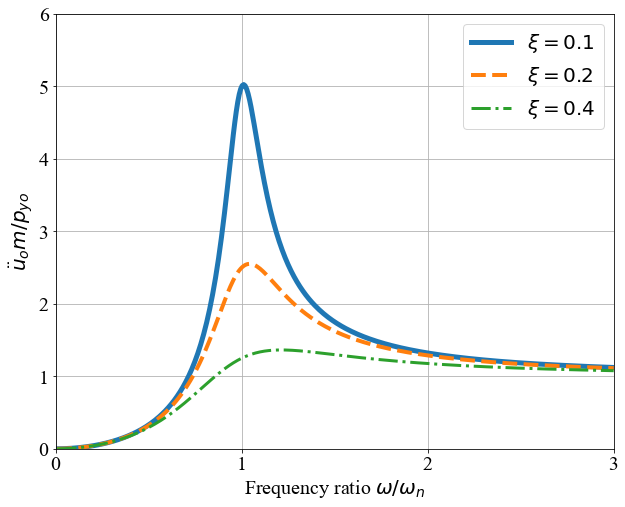

In [14]:
import numpy as np
from matplotlib import pyplot as plt

# structure mass
m = 1000.0

# structure periods
Tns = np.arange(1, 5001, 1)*0.001*5
wns = (2.0*np.pi)/Tns
print(max(abs(wns)))

# structure damping
xis = [0.1, 0.2, 0.4]

# generator mass and eccentricity
me = 1/m
e = 5.0

# external force frequency
w = 10.0

# data size
len_Tns = len(Tns)

# run and plot
plt.figure(figsize=(10, 8))
plt.rcParams["font.family"] = "Times New Roman"  

for ly, xi in enumerate(xis):
    fre_rat = np.zeros(len_Tns)
    acc_spe = np.zeros(len_Tns)
    
    linestyle = "-"
    lw = 5
    if (ly == 1):
        lw = 4
        linestyle = "--"
    elif (ly == 2):
        lw = 3
        linestyle = "-."

    for i, wn in enumerate(wns):

        # structure stiffness
        wn2 = wn*wn
        k = m*wn2

        # force coefficient
        w2 = w*w
        po = me*e*w2

        # Rd, Ra factor
        Rd = 1/np.sqrt(pow(1-w2/wn2, 2) + pow(2.0*xi*w/wn, 2))
        Ra = w2/wn2*Rd

        # normalized acceleration
        ao = po/m*Ra
        acc_spe[i] = ao*m/po

        # frequency ratio
        fre_rat[i] = w/wn
        
    # plot line
    plt.plot(fre_rat, acc_spe, linestyle, lw=lw, label=r"$\xi = %3.1f$"%xi)

plt.xlabel(r"Frequency ratio $\omega/\omega_n$", fontsize=20)
plt.ylabel(r"$\ddot u_om/p_{yo}$", fontsize=20) # \frac{\ddot u_om}{p_{yo}}
plt.xticks([0, 1, 2, 3], fontsize=20)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 8, 10], fontsize=20)
plt.xlim(0, 3)
plt.ylim(0, 6) 
plt.legend(loc=1, fontsize=20)
plt.grid(True)
plt.savefig(r"C:\Users\user\Downloads\normalized roof acceleration spectrum.png")
plt.show()